In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

%matplotlib inline

In [26]:
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
data.dtypes

gender                         object
race                           object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
a=pd.get_dummies(data.gender)
b=pd.get_dummies(data.lunch)
c=pd.get_dummies(data.race)
d=pd.get_dummies(data.parental_level_of_education)
e=pd.get_dummies(data.test_preparation_course)
merge=pd.concat([data,a,b,c,d,e],axis='columns')

d1=merge.drop(['gender','lunch','race','parental_level_of_education','test_preparation_course'],axis='columns')


In [6]:
data=d1.drop(['writing score','reading score'],axis=1)

In [7]:
data

,math score,female,male,free/reduced,standard,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none
0,72,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,69,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
2,90,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
3,47,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,76,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
5,71,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
6,88,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
7,40,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
8,64,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
9,38,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [8]:
correlation = data.corr('spearman')

In [9]:
correlation

,math score,female,male,free/reduced,standard,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none
math score,1.000000,-0.159972,0.159972,-0.337355,0.337355,-0.103347,-0.079292,-0.076165,0.057030,0.204493,0.049257,0.075317,-0.123315,0.059542,0.033693,-0.062442,0.169801,-0.169801
female,-0.159972,1.000000,-1.000000,0.021372,-0.021372,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,-0.006028,0.006028
male,0.159972,-1.000000,1.000000,-0.021372,0.021372,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.006028,-0.006028
free/reduced,-0.337355,0.021372,-0.021372,1.000000,-1.000000,0.032329,0.008257,0.003385,0.009458,-0.052398,-0.009102,0.013668,0.002211,0.027095,-0.006146,-0.013874,0.017044,-0.017044
standard,0.337355,-0.021372,0.021372,-1.000000,1.000000,-0.032329,-0.008257,-0.003385,-0.009458,0.052398,0.009102,-0.013668,-0.002211,-0.027095,0.006146,0.013874,-0.017044,0.017044
group A,-0.103347,-0.071001,0.071001,0.032329,-0.032329,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,-0.006315,0.006315
group B,-0.079292,0.028466,-0.028466,0.008257,-0.008257,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.000106,0.000106
group C,-0.076165,0.063368,-0.063368,0.003385,-0.003385,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.012522,-0.012522
group D,0.057030,-0.030566,0.030566,0.009458,-0.009458,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.055956,0.055956
group E,0.204493,-0.020302,0.020302,-0.052398,0.052398,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.059393,-0.059393


In [10]:
abs(correlation['math score']).sort_values()


some college          0.033693
associate's degree    0.049257
group D               0.057030
master's degree       0.059542
some high school      0.062442
bachelor's degree     0.075317
group C               0.076165
group B               0.079292
group A               0.103347
high school           0.123315
female                0.159972
male                  0.159972
none                  0.169801
completed             0.169801
group E               0.204493
standard              0.337355
free/reduced          0.337355
math score            1.000000
Name: math score, dtype: float64

In [11]:
# target = data['math score']


In [12]:
# x = np.array(data[['some college',"associate's degree",'group D',"master's degree","some high school","bachelor's degree","group C",
#                   "group B","group A","high school","female","male","none","completed","group E","standard","free/reduced"]]) 
# y = np.array(target)
# scalar = MinMaxScaler()
# x = scalar.fit_transform(x)


# xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)



# ypred = regressor.predict(xtest)

# print(accuracy_score(ypred,ytest))

In [13]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [14]:
def feed_forward(data, w0,w1,w2, b):
  
    layer0 = data
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = np.dot(layer2, w2) + b

    return layer0, layer1, layer2, layer3

In [15]:
def back_propogation(i, layer0, layer1, layer2, layer3, actual_y, w0,w1,w2, b, learning_rate):
  
    
    op_delta = layer3 - actual_y
    dh3 = np.dot(layer2.T, op_delta)
    
    l2_error = op_delta.dot(w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer3-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%10000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,b

In [16]:
X=pd.DataFrame(data.drop(['math score'],axis=1))

In [17]:
Y=pd.DataFrame(data['math score'])

In [18]:
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())

In [19]:
x=np.array(X)
y=np.array(Y)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
epochs = 150000
loss_curve=[]
iters=[]

In [22]:
np.random.seed(3)
w0=np.random.random((17,14))-1
w1=np.random.random((14,3))-1
w2=np.random.random((3,1))-1

b = np.random.random((1,1))

In [23]:
for i in range(epochs):
    layer0,layer1,layer2,layer3=feed_forward(x_train,w0,w1,w2,b)
    w0,w1,w2,b=back_propogation(i,layer0,layer1,layer2,layer3,y_train,w0,w1,w2,b,0.001)


 10000 0.016918698827307913

 20000 0.016724612101717495

 30000 0.016600184067866605

 40000 0.016503191023424214

 50000 0.016408009466920954

 60000 0.01631590039716745

 70000 0.016229540893596184

 80000 0.0161452269584204

 90000 0.01606303531111812

 100000 0.015982109180558354

 110000 0.015901200857321357

 120000 0.015809063950472647

 130000 0.015686151193413368

 140000 0.015534524636408259


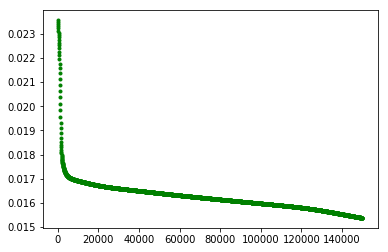

In [24]:
plt.plot(iters, loss_curve, 'g.')

In [25]:
layer0,layer1,layer2,layer3=feed_forward(x_test,w0,w1,w2,b)
loss=np.mean(np.power(layer3-y_test,2))
np.sqrt(loss)

0.1391518251704548